In [202]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)

In [203]:
df=pd.read_csv("model_post_eda_bicodec.csv")
#msno.matrix(df)

In [204]:
df

,diff_resolution,diff_framerate,diff_bitrate,diff_ratio,frames,umem,duration,size,codec_concat_flv-h264,codec_concat_vp8-vp8,codec_concat_flv-mpeg4,codec_concat_flv-vp8,codec_concat_h264-flv,codec_concat_h264-h264,codec_concat_h264-mpeg4,codec_concat_h264-vp8,codec_concat_mpeg4-h264,codec_concat_mpeg4-mpeg4,codec_concat_mpeg4-vp8,codec_concat_vp8-flv,codec_concat_vp8-h264,codec_concat_vp8-mpeg4,utime
0,-844800,-4.937442,-13097,-0.444444,16146,218932,645.840000,7742262,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15.929
1,0,-6.970000,5179648,0.000000,7830,218932,326.588320,244926878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.417
2,-1996800,1.000000,-77983,-0.444444,11826,645544,473.000000,9697521,0,0,0,0,0,1,0,0,0,0,0,0,0,0,45.327
3,-1152000,15.002232,-947574,0.000000,13441,655172,448.575000,115083398,0,0,0,0,0,0,0,0,0,0,0,0,1,0,102.842
4,-1996800,0.000000,-569724,-0.444444,6382,216820,255.280000,7986338,0,0,1,0,0,0,0,0,0,0,0,0,0,0,14.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-896256,-22.970000,-4945662,-0.555556,344,324540,49.178333,334032,0,0,0,0,0,0,0,0,1,0,0,0,0,0,34.462
11996,-1900800,14.000000,-129959,-0.444444,2417,654236,80.536000,6946645,0,0,0,0,0,1,0,0,0,0,0,0,0,0,68.984
11997,0,-16.487333,-25925,0.000000,10112,327492,750.433000,74487589,0,0,0,0,0,0,0,0,0,0,0,0,1,0,33.402
11998,-844800,0.000000,-77983,-0.444444,11826,318500,473.000000,9697521,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30.266


In [205]:
y = df['utime']
X = df.drop("utime",axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [206]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

In [207]:
# manual
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.1, 
                max_depth = 10, alpha = 10, n_estimators = 2000, gamma = 0, min_child_weight = 15, subsample = 0.7)

In [208]:
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)

In [209]:
imp=xgb_r.feature_importances_

In [210]:
print("Features Importance:\n")

for i in range(len(df.columns[:-1])):
    print(df.columns[i]+": \n"+str(round(imp[i],2))+"\n")

Features Importance:

diff_resolution: 
0.04

diff_framerate: 
0.03

diff_bitrate: 
0.12

diff_ratio: 
0.03

frames: 
0.04

umem: 
0.26

duration: 
0.04

size: 
0.06

codec_concat_flv-h264: 
0.01

codec_concat_vp8-vp8: 
0.08

codec_concat_flv-mpeg4: 
0.02

codec_concat_flv-vp8: 
0.05

codec_concat_h264-flv: 
0.05

codec_concat_h264-h264: 
0.02

codec_concat_h264-mpeg4: 
0.01

codec_concat_h264-vp8: 
0.08

codec_concat_mpeg4-h264: 
0.0

codec_concat_mpeg4-mpeg4: 
0.02

codec_concat_mpeg4-vp8: 
0.01

codec_concat_vp8-flv: 
0.0

codec_concat_vp8-h264: 
0.02

codec_concat_vp8-mpeg4: 
0.01



In [211]:
df.columns[:10]

Index(['diff_resolution', 'diff_framerate', 'diff_bitrate', 'diff_ratio',
       'frames', 'umem', 'duration', 'size', 'codec_concat_flv-h264',
       'codec_concat_vp8-vp8'],
      dtype='object')

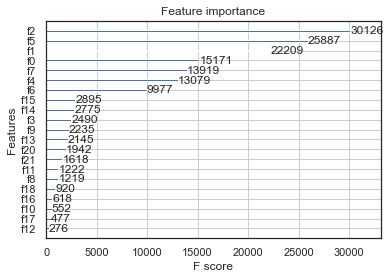

In [212]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_r)
pyplot.show()

In [69]:
#DIFF + Classic dummies
from sklearn import metrics

print("Score Train:")
print("MAE train: ", metrics.mean_absolute_error(train_y, xgb_r.predict(train_X)))
print("MSE train: ",metrics.mean_squared_error(train_y, xgb_r.predict(train_X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(train_y, xgb_r.predict(train_X))))
print("r2: ",np.sqrt(metrics.r2_score(train_y, xgb_r.predict(train_X))))
print("\n")
print("Score test:")
print("MAE test: ", metrics.mean_absolute_error(test_y, xgb_r.predict(test_X))) 
print("MSE test: ",metrics.mean_squared_error(test_y, xgb_r.predict(test_X)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(test_y, xgb_r.predict(test_X))))
print("r2: ",np.sqrt(metrics.r2_score(test_y, xgb_r.predict(test_X))))

Score Train:
MAE train:  0.7807529140520097
MSE train:  1.1540656906931408
RMSE train:  1.0742744950398575
r2:  0.9989427468318363


Score test:
MAE test:  1.6185275793083511
MSE test:  8.190364402620187
RMSE test:  2.8618812698328675
r2:  0.9926715918337378


In [174]:
#DIFF + Classic dummies 30%
from sklearn import metrics

print("Score Train:")
print("MAE train: ", metrics.mean_absolute_error(train_y, xgb_r.predict(train_X)))
print("MSE train: ",metrics.mean_squared_error(train_y, xgb_r.predict(train_X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(train_y, xgb_r.predict(train_X))))
print("r2: ",np.sqrt(metrics.r2_score(train_y, xgb_r.predict(train_X))))
print("\n")
print("Score test:")
print("MAE test: ", metrics.mean_absolute_error(test_y, xgb_r.predict(test_X))) 
print("MSE test: ",metrics.mean_squared_error(test_y, xgb_r.predict(test_X)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(test_y, xgb_r.predict(test_X))))
print("r2: ",np.sqrt(metrics.r2_score(test_y, xgb_r.predict(test_X))))

Score Train:
MAE train:  0.4882624397859119
MSE train:  0.4466091527140494
RMSE train:  0.6682882257784057
r2:  0.9995921780486662


Score test:
MAE test:  1.5563310982661778
MSE test:  8.295800723485563
RMSE test:  2.880243170894701
r2:  0.9924604383782256


In [153]:
#No duration and size + classic dummies + DIFF
from sklearn import metrics

print("Score Train:")
print("MAE train: ", metrics.mean_absolute_error(train_y, xgb_r.predict(train_X)))
print("MSE train: ",metrics.mean_squared_error(train_y, xgb_r.predict(train_X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(train_y, xgb_r.predict(train_X))))
print("r2: ",np.sqrt(metrics.r2_score(train_y, xgb_r.predict(train_X))))
print("\n")
print("Score test:")
print("MAE test: ", metrics.mean_absolute_error(test_y, xgb_r.predict(test_X))) 
print("MSE test: ",metrics.mean_squared_error(test_y, xgb_r.predict(test_X)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(test_y, xgb_r.predict(test_X))))
print("r2: ",np.sqrt(metrics.r2_score(test_y, xgb_r.predict(test_X))))

Score Train:
MAE train:  0.5411662035687763
MSE train:  0.5621882440480624
RMSE train:  0.7497921338931627
r2:  0.9994866096890528


Score test:
MAE test:  1.8495928203614551
MSE test:  11.135594844649914
RMSE test:  3.3370038724355586
r2:  0.9898663241097244


In [185]:
#DIFF + Classic dummies 30% (NO FLV, YES VP8)
from sklearn import metrics

print("Score Train:")
print("MAE train: ", metrics.mean_absolute_error(train_y, xgb_r.predict(train_X)))
print("MSE train: ",metrics.mean_squared_error(train_y, xgb_r.predict(train_X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(train_y, xgb_r.predict(train_X))))
print("r2: ",np.sqrt(metrics.r2_score(train_y, xgb_r.predict(train_X))))
print("\n")
print("Score test:")
print("MAE test: ", metrics.mean_absolute_error(test_y, xgb_r.predict(test_X))) 
print("MSE test: ",metrics.mean_squared_error(test_y, xgb_r.predict(test_X)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(test_y, xgb_r.predict(test_X))))
print("r2: ",np.sqrt(metrics.r2_score(test_y, xgb_r.predict(test_X))))

Score Train:
MAE train:  0.48080005833217077
MSE train:  0.4342126767383216
RMSE train:  0.6589481593709187
r2:  0.999603500158072


Score test:
MAE test:  1.5477082344712152
MSE test:  8.220053595844487
RMSE test:  2.8670635841997796
r2:  0.992529539538777


In [213]:
df.columns

Index(['diff_resolution', 'diff_framerate', 'diff_bitrate', 'diff_ratio',
       'frames', 'umem', 'duration', 'size', 'codec_concat_flv-h264',
       'codec_concat_vp8-vp8', 'codec_concat_flv-mpeg4',
       'codec_concat_flv-vp8', 'codec_concat_h264-flv',
       'codec_concat_h264-h264', 'codec_concat_h264-mpeg4',
       'codec_concat_h264-vp8', 'codec_concat_mpeg4-h264',
       'codec_concat_mpeg4-mpeg4', 'codec_concat_mpeg4-vp8',
       'codec_concat_vp8-flv', 'codec_concat_vp8-h264',
       'codec_concat_vp8-mpeg4', 'utime'],
      dtype='object')

In [214]:
#DIFF + duration and size + bidummies
from sklearn import metrics

print("Score Train:")
print("MAE train: ", metrics.mean_absolute_error(train_y, xgb_r.predict(train_X)))
print("MSE train: ",metrics.mean_squared_error(train_y, xgb_r.predict(train_X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(train_y, xgb_r.predict(train_X))))
print("r2: ",np.sqrt(metrics.r2_score(train_y, xgb_r.predict(train_X))))
print("\n")
print("Score test:")
print("MAE test: ", metrics.mean_absolute_error(test_y, xgb_r.predict(test_X))) 
print("MSE test: ",metrics.mean_squared_error(test_y, xgb_r.predict(test_X)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(test_y, xgb_r.predict(test_X))))
print("r2: ",np.sqrt(metrics.r2_score(test_y, xgb_r.predict(test_X))))

Score Train:
MAE train:  0.5046216692842757
MSE train:  0.4745294163872756
RMSE train:  0.6888609557721178
r2:  0.9995666770834559


Score test:
MAE test:  1.6382163790512085
MSE test:  8.585617225454934
RMSE test:  2.930122390866111
r2:  0.9921960056154046


In [223]:
categorical_features=list(range(8,22))

In [224]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df_X_train=pd.DataFrame(train_X,columns=df.drop('utime',axis=1).columns)


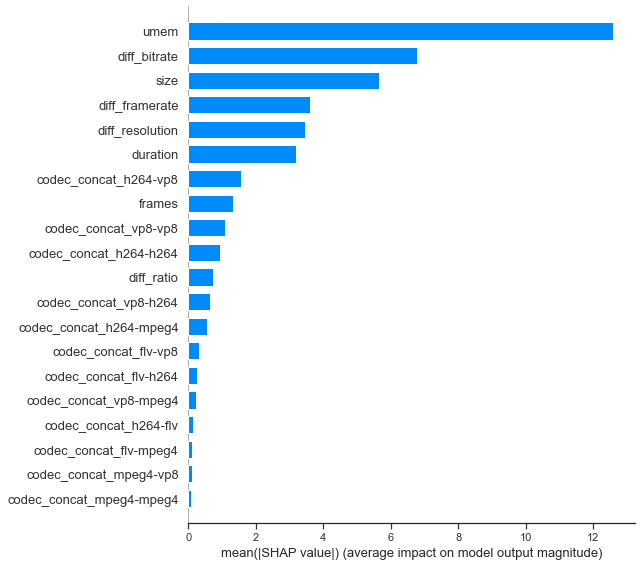

In [225]:
import shap  

explainer_rf = shap.TreeExplainer(xgb_r,categorical_features=categorical_features)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")



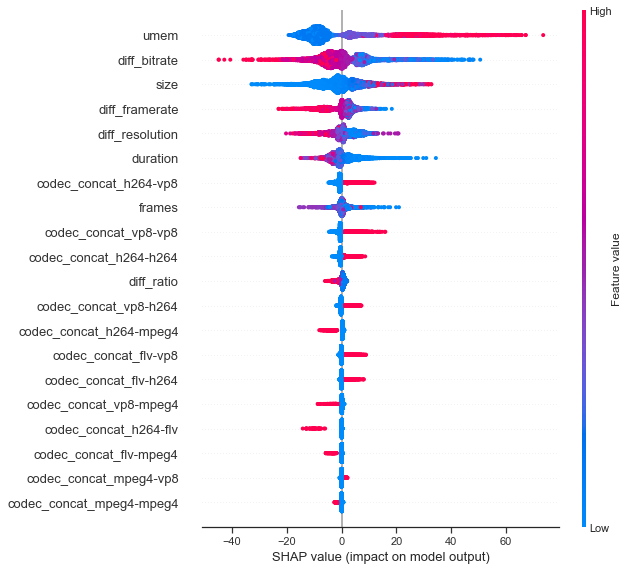

In [226]:
shap.summary_plot(shap_values, df_X_train)

In [109]:
actual=test_y.tolist()
actual = [float(i) for i in actual]
pred = [float(i) for i in pred]

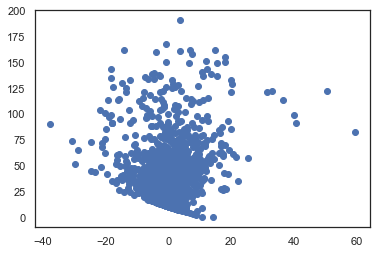

In [110]:
diff=[]
i=0

for p in pred:
    diff.append(round(actual[i]-p,3))
    i=i+1
    
plt.scatter(diff,pred)

plt.show()

In [111]:
np.median(diff)

-0.0805

In [126]:
# Instantiation
xgb_r = xg.XGBRegressor()

parameters = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'objective' : ['reg:squarederror'],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50],
              'min_child_weight': [2,5,10,15],
              'colsample_bytree' : [0.3,0.6,0.9],
              'n_estimators': [1000,1500,2000], #number of trees, change it to 1000 for better results
              'seed': [1337],
              'eval_metric': ["mae"]}

In [127]:
gs = GridSearchCV(xgb_r, parameters, cv=5, scoring = 'neg_mean_absolute_error', verbose=0, n_jobs=5, refit=True)
gs.fit(train_X,train_y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.9],

In [128]:
gs.best_params_

{'colsample_bytree': 0.9,
 'eval_metric': 'mae',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 15,
 'n_estimators': 2000,
 'nthread': -1,
 'objective': 'reg:squarederror',
 'seed': 1337}

In [129]:
gs.best_score_

-1.8546088114352455

In [130]:
# Predict the model
pred = gs.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  3.132673


In [132]:
#BEST ONE UNTIL NOW - SIGNED DIFF + CLASSIC DUMMIES
from sklearn import metrics

print("Score Train:")
print("MAE train: ", metrics.mean_absolute_error(train_y, gs.predict(train_X)))
print("MSE train: ",metrics.mean_squared_error(train_y, gs.predict(train_X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(train_y, gs.predict(train_X))))
print("r2: ",np.sqrt(metrics.r2_score(train_y, gs.predict(train_X))))
print("\n")
print("Score test:")
print("MAE test: ", metrics.mean_absolute_error(test_y, gs.predict(test_X))) 
print("MSE test: ",metrics.mean_squared_error(test_y, gs.predict(test_X)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(test_y, gs.predict(test_X))))
print("r2: ",np.sqrt(metrics.r2_score(test_y, gs.predict(test_X))))

Score Train:
MAE train:  0.339462238230024
MSE train:  0.21417012679243716
RMSE train:  0.4627851842836341
r2:  0.9998044509225029


Score test:
MAE test:  1.6423119891177282
MSE test:  9.813641831042485
RMSE test:  3.132673272309528
r2:  0.991074755371755


-check 5 r2 multicoll dataframe
-importanza regressori/colonne superflue/shap values
-allestire report
-provare modelli

provare:
-diff colonne

        resolution = widthheight - o_widtho_height
        framerate = framerate - o_framerate
        bitrate = bitrate - o_bitrate
        codec = coppie i_o
        umem
        frames

-res/ration only news